# Regression and Classification
## Linear regression


In [7]:
import warnings
warnings.filterwarnings("ignore")

### Import data

In [8]:
# lets make sure we are on the right version of scikit-learn
# !pip install scikit-learn==0.22.2.post1
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pylab as plt
import numpy as np
boston = datasets.load_boston()
X = boston.data
y = boston.target


In [22]:
def produce_predictions_linear_regression(train_X, test_X, train_y, test_y, plot=False):
    model = LinearRegression()
    model.fit(train_X, train_y)
    predictions = model.predict(test_X)
    print("The first 5 predictions are %s" % predictions[:5])
    print("The first 5 true values are %s" % test_y[:5])
    
    if plot:
        plt.scatter(test_X, test_y, color='green')
        plt.scatter(test_X, predictions, color='red')
        plt.show()
    mse = mean_squared_error(test_y, predictions)
    return predictions, mse

The first 5 predictions are [26.07396957 19.91176827 22.83070573 17.67751985 26.90280366]
The first 5 true values are [22.6 50.  23.   8.3 21.2]


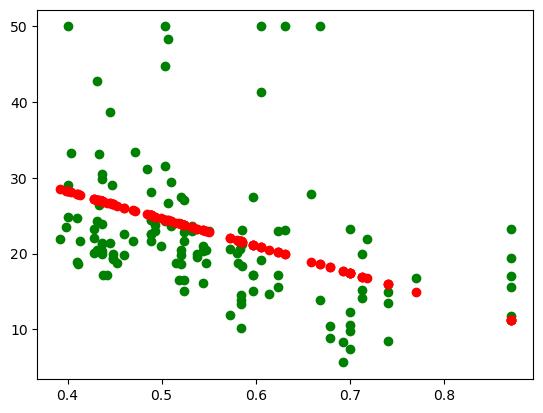

Mean squared error on the the test set: 72.83


In [23]:
# Predicting based on the NOX attribute
nox = X[:,[4]]
train_X, test_X, train_y, test_y = train_test_split(nox, y, test_size=0.25, random_state=0,)
nox_predictions, nox_mse = produce_predictions_linear_regression(train_X, test_X, train_y, test_y, True)
print('Mean squared error on the the test set: %.2f' % nox_mse )

The first 5 predictions are [22.7979148  21.70829974 23.17043277 13.63397276 21.85730693]
The first 5 true values are [22.6 50.  23.   8.3 21.2]


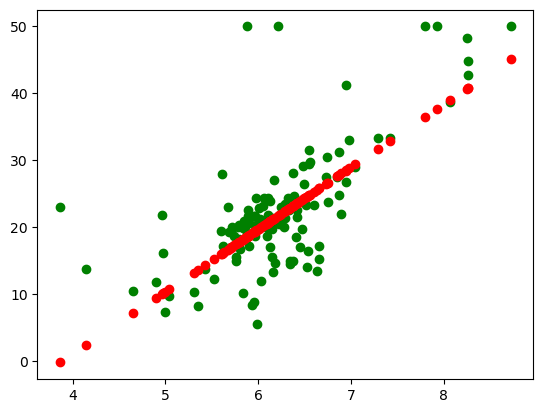

Mean squared error on the test set 43.47


In [28]:
num_rooms = X[:,[5]]
# Predicting based on the num_rooms attribute
train_X, test_X, train_y, test_y = train_test_split(num_rooms, y, test_size=0.25, random_state=0,)
num_rooms_predictions, num_rooms_mse = produce_predictions_linear_regression(train_X, test_X, train_y, test_y,True)

print('Mean squared error on the test set %.2f' % num_rooms_mse )

In [25]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.25, random_state=0,)
# print('The first row of data in the training set is %s' % train_X[0])
all_predictions, all_mse = produce_predictions_linear_regression(train_X, test_X, train_y, test_y)
print('Mean squared error on the test set %.2f' % all_mse )

The first 5 predictions are [24.95233283 23.61699724 29.20588553 11.96070515 21.33362042]
The first 5 true values are [22.6 50.  23.   8.3 21.2]
Mean squared error on the test set 29.78


The first 5 predictions are [26.07396957 19.91176827 22.83070573 17.67751985 26.90280366]
The first 5 true values are [22.6 50.  23.   8.3 21.2]
The first 5 predictions are [22.7979148  21.70829974 23.17043277 13.63397276 21.85730693]
The first 5 true values are [22.6 50.  23.   8.3 21.2]
The first 5 predictions are [24.95233283 23.61699724 29.20588553 11.96070515 21.33362042]
The first 5 true values are [22.6 50.  23.   8.3 21.2]


Text(0, 0.5, 'MSE')

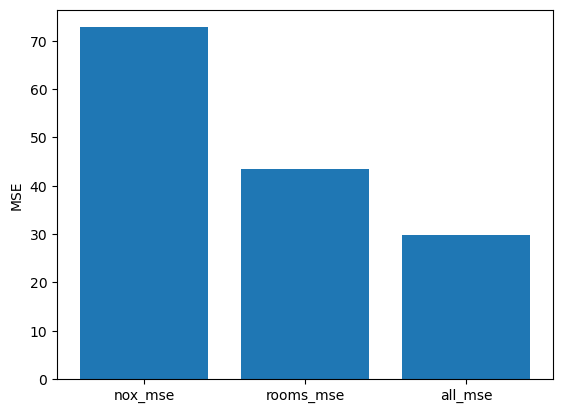

In [27]:
# Comparison of MSEs

variables = [X[:,[4]], X[:,[5]], X]
labels = ['nox_mse', 'rooms_mse', 'all_mse']
mses = []

for var in variables:
    train_X, test_X, train_y, test_y = train_test_split(var, y, test_size=0.25, random_state=0,)
    predictions, mse = produce_predictions_linear_regression(train_X, test_X, train_y, test_y)
    mses.append(mse)

import numpy as np
y_pos = np.arange(len(mses))

plt.bar(y_pos, mses)
plt.xticks(y_pos, labels)
plt.ylabel('MSE')


## Classification

In [29]:
import pandas as pd
dff = pd.read_csv('titanic.csv')
dff.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
# One hot encode Sex column
df = pd.get_dummies(dff, columns=['Sex'])

# Replace and extract survived column
y = dff.Survived.replace(0, -1)

# Extract useful columns
X = df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male']]

# Replace NaN values
X['Age'] = X['Age'].fillna(X['Age'].mean())
X.tail()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
886,2,27.000000,0,0,13.00,0,1
887,1,19.000000,0,0,30.00,1,0
888,3,29.699118,1,2,23.45,1,0
889,1,26.000000,0,0,30.00,0,1
890,3,32.000000,0,0,7.75,0,1


### Apply Perceptron classifier

In [42]:
from sklearn.linear_model import Perceptron
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.25, random_state=0)

# Initialise model
clf = Perceptron(max_iter=100, tol=0.0001, random_state=0)

# Train model with training data
clf.fit(train_X, train_y)

# Predict results using test data
predictions = clf.predict(test_X)

#### Calculate accuracy

In [41]:
from sklearn.metrics import accuracy_score

test_acc_perceptron = accuracy_score(test_y, predictions)

print('The accuracy of the perceptron classifier on the test set is %.2f' % test_acc_perceptron)

The accuracy of the perceptron classifier on the test set is 0.70


#### Measuring bias/variance

In [43]:
def plot_train_test(train_acc, test_acc):
    error = [1-train_acc, 1-test_acc]
    labels = ['train error', 'test error']
    y_pos = np.arange(len(error))

    plt.bar(y_pos, error)
    plt.xticks(y_pos, labels)
    plt.ylabel('Error')
    plt.ylim([0,1])
    plt.show()

The accuracy of the perceptron classifier on the training set is 0.71


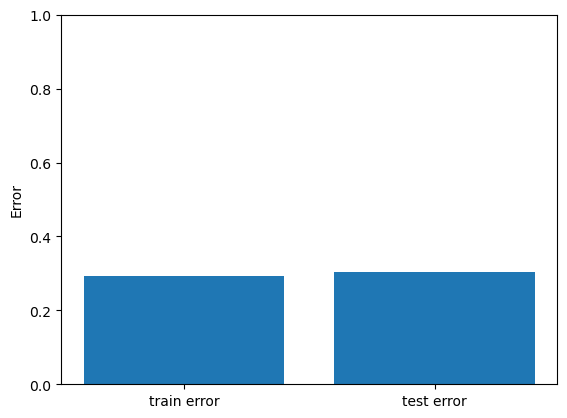

In [46]:
predictions = clf.predict(train_X)
train_acc_perceptron = accuracy_score(train_y, predictions)
print('The accuracy of the perceptron classifier on the training set is %.2f' % train_acc_perceptron)
plot_train_test(train_acc_perceptron, test_acc_perceptron)

### Apply the Decision Tree classifier

In [48]:
def plot_errors(data, labels):
    error = [1 - x for x in data]

    y_pos = np.arange(len(error))

    plt.bar(y_pos, error)
    plt.xticks(y_pos, labels)
    plt.ylabel('Error')
    plt.ylim([0,1])
    plt.show()
    
def calc_accuracy(dec_tree_clf, label, train_X, train_y, data):
    dec_tree_clf.fit(train_X, train_y)
    train_predictions = dec_tree_clf.predict(train_X)
    train_acc_tree = accuracy_score(train_y, train_predictions)

    test_predictions = dec_tree_clf.predict(test_X)
    test_acc_tree = accuracy_score(test_y, test_predictions)

    data.append([label, train_acc_tree, test_acc_tree])    
    return data

def generate_comparison(df):
    import plotly.graph_objects as go
    fig = go.Figure()
    fig.add_trace(go.Scatter(
        x=df.Label,
        y=df.Train_acc,
        name='Training Accuracy',
        marker_color='indianred'
    ))
    fig.add_trace(go.Scatter(
        x=df.Label,
        y=df.Test_acc,
        name='Test Accuracy',
        marker_color='lightsalmon'
    ))

    # Here we modify the tickangle of the xaxis, resulting in rotated labels.
    fig.update_layout(barmode='group', xaxis_tickangle=-45)
    fig.show()

#### Regularising the decision tree
Increasing min_* hyperparameters or reducing max_* hyperparameters will regularise model

In [52]:
from sklearn.tree import DecisionTreeClassifier

data, labels = [], []
dec_tree_clf = DecisionTreeClassifier(random_state=0, criterion='entropy')
data = calc_accuracy(dec_tree_clf,'Base', train_X, train_y, data)

# Tuning hyperparameters
for mi in range(5):
    # Varying max depth
    dec_tree_clf = DecisionTreeClassifier(random_state=0, criterion='entropy', max_depth=mi+8)
    label = 'max_depth = ' + str(mi+8)
    data = calc_accuracy(dec_tree_clf, label, train_X, train_y, data)
    
for fi in range(5):
    # Varying max features
    dec_tree_clf = DecisionTreeClassifier(random_state=0, criterion='entropy', max_features=fi+3)
    label = 'max_features = ' + str(fi+3)
    data = calc_accuracy(dec_tree_clf, label, train_X, train_y, data)

for i in range(5):
    # Varying max leaf nodes
    dec_tree_clf = DecisionTreeClassifier(random_state=0, criterion='entropy', max_leaf_nodes=(i+4)*5)
    label = 'max_leaf_nodes = ' + str((i+4)*5)
    data = calc_accuracy(dec_tree_clf, label, train_X, train_y, data)
    
for i in range(5):
    # Varying min samples
    dec_tree_clf = DecisionTreeClassifier(random_state=0, criterion='entropy', min_samples_leaf=i+8)
    label = 'Min samples per leaf = ' + str(i+8)
    data = calc_accuracy(dec_tree_clf, label, train_X, train_y, data)

for i in range(5):
    # Varying min samples split
    dec_tree_clf = DecisionTreeClassifier(random_state=0, criterion='entropy', min_samples_split=i+3)
    label = 'min_samples_split = ' + str(i+3)
    data = calc_accuracy(dec_tree_clf, label, train_X, train_y, data)

# Optimal hyper-parameters
dec_tree_clf = DecisionTreeClassifier(random_state=0, criterion='entropy', min_samples_leaf=10, max_leaf_nodes=40,
                                      min_samples_split=12, max_depth=10, max_features=5)

data = calc_accuracy(dec_tree_clf,'Regularised', train_X, train_y, data)

df = pd.DataFrame(data, columns = ['Label', 'Train_acc', 'Test_acc'])
generate_comparison(df)    

In [59]:
# Determine best hyperparameter
idmax = df.Test_acc.idxmax()
df.iloc[idmax]

Label        Min samples per leaf = 11
Train_acc                     0.859281
Test_acc                      0.856502
Name: 19, dtype: object

In [58]:
dec_tree_clf = DecisionTreeClassifier(random_state=0, criterion='entropy', min_samples_leaf=11)
dec_tree_clf.fit(train_X, train_y)

test_predictions = dec_tree_clf.predict(test_X)
test_acc_dec_tree_reg = accuracy_score(test_y, test_predictions)
print(test_acc_dec_tree_reg)

0.8565022421524664


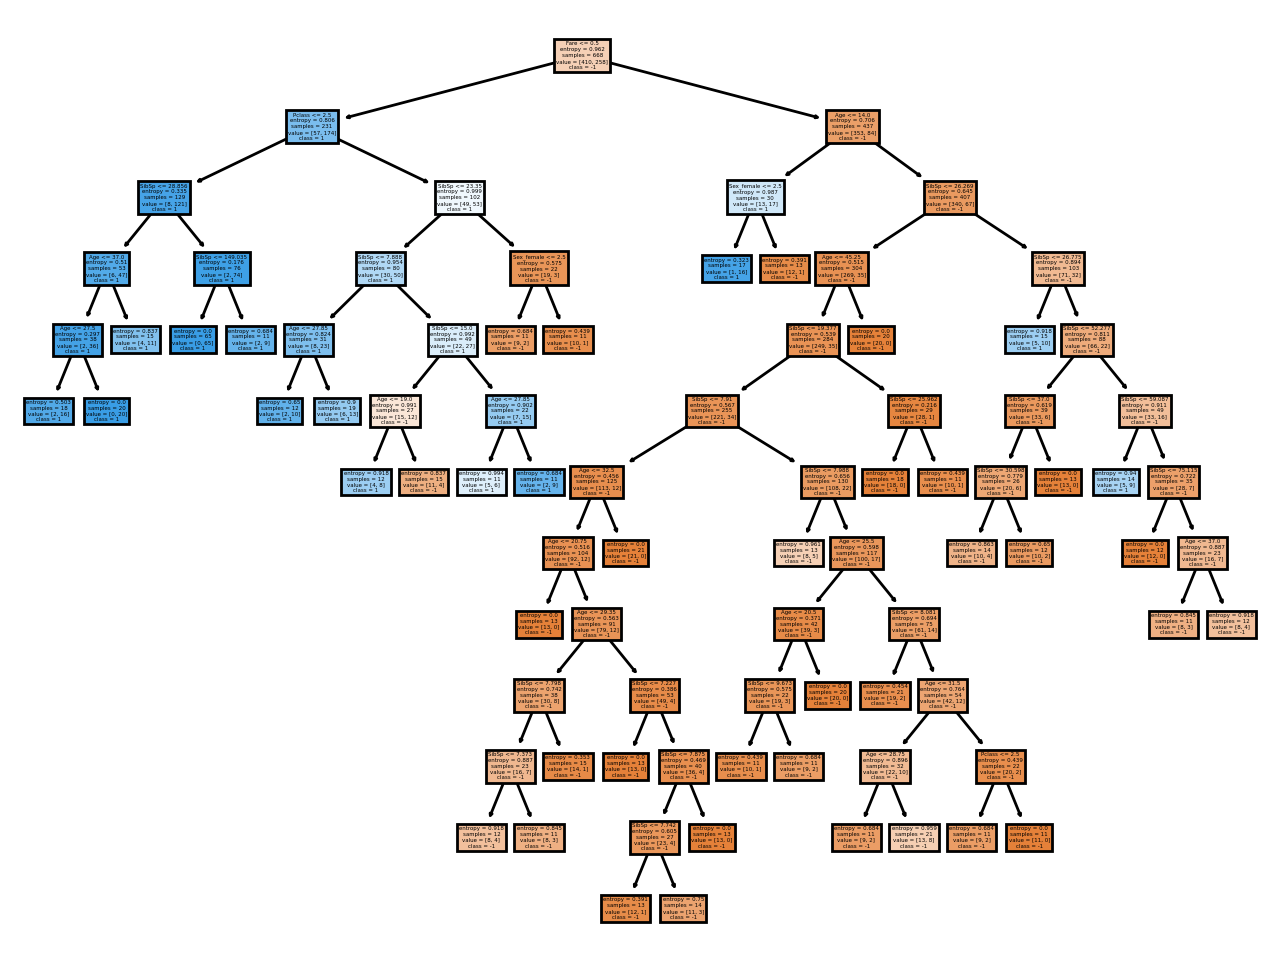

In [60]:
from matplotlib.pyplot import figure
import plotly.express as px
figure(figsize=(8, 6), dpi=200)
from sklearn import tree
tree.plot_tree(dec_tree_clf, feature_names=['Pclass', 'Age', 'Sex_female', 'Sex_male', 'SibSp', 'Parch', 'Fare'], filled=True, class_names=y.astype(str))
plt.show()

### Regularising a Perceptron
 Have a look at the documentation for the perceptron (https://scikit-learn.org/0.22/modules/generated/sklearn.linear_model.Perceptron.html)

 **Task: Investigate and experiment with regularisation parameters, and store the accuracy of the resulting model in a new variable `test_acc_perceptron_reg'.**

In [62]:
def calc_accuracies(clf, train_X, train_y, test_X, test_y):
    clf.fit(train_X, train_y)
    train_predictions = clf.predict(train_X)
    train_acc_tree = accuracy_score(train_y, train_predictions)

    test_predictions = dec_tree_clf.predict(test_X)
    test_acc_tree = accuracy_score(test_y, test_predictions)

    return train_acc_tree, test_acc_tree
    

In [67]:
label = []
data = []

perceptron_clf = Perceptron(max_iter=100, tol=0.0001, random_state=0)
label.append('base')
test_acc_perceptron, train_acc_perceptron = calc_accuracies(perceptron_clf, train_X, train_y, test_X, test_y)
data.append(test_acc_perceptron)

perceptron_clf = Perceptron(max_iter=100, tol=0.0001, random_state=0, penalty='l1')
label.append('l1')
test_acc_perceptron_reg, train_acc_perceptron_reg = calc_accuracies(perceptron_clf, train_X, train_y, test_X, test_y)
data.append(test_acc_perceptron_reg)

perceptron_clf = Perceptron(max_iter=100, tol=0.0001, random_state=0, penalty='l2')
label.append('l2')
test_acc_perceptron_reg, train_acc_perceptron_reg = calc_accuracies(perceptron_clf, train_X, train_y, test_X, test_y)
data.append(test_acc_perceptron_reg)

perceptron_clf = Perceptron(max_iter=100, tol=0.0001, random_state=0, penalty='elasticnet')
label.append('elasticnet')
test_acc_perceptron_reg, train_acc_perceptron_reg = calc_accuracies(perceptron_clf, train_X, train_y, test_X, test_y)
data.append(test_acc_perceptron_reg)

for i in [0.01, 0.1, 0.3, 1, 10]:
    perceptron_clf = Perceptron(max_iter=100, tol=i, random_state=0, penalty='elasticnet')
    label.append('l1 alpha =' + str(i))
    test_acc_perceptron_reg, train_acc_perceptron_reg = calc_accuracies(perceptron_clf, train_X, train_y, test_X, test_y)
    data.append(test_acc_perceptron_reg)

plot_accuracies(data, label)

### Visualising the performance of all models
Finally, let's make a bar chart that plots the accuracy of our four models on the test set. Those models are
the original perceptron, the regularised perceptron, the original decision tree and the regularised decision tree.

To do this, you can modify the bar plotting function from earlier, which is included below. 

**Task: use this function to plot the accuracies of the four models. Use the code below to figure out which variables you need to pass to the function.**

In [65]:
def plot_accuracies(test_accuracies, model_names):
    dic = {'Model names': model_names, 'Accuracy': test_accuracies}
    df = pd.DataFrame(dic)
    fig = px.bar(df, x='Model names', y='Accuracy')
    fig.show()


In [68]:
accs = [dec_tree_acc, dec_tree_acc_reg, test_acc_perceptron, test_acc_perceptron_reg]
model_names = ['Decision tree', 'Decision tree regularised', 'Perceptron', 'Perceptron regularised']

plot_accuracies(accs, model_names)